In [2]:
from datetime import datetime

my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

my_date = datetime(my_year,my_month,my_day,my_hour,my_min, my_sec)
print(my_date)

2020-01-02 13:30:15


In [3]:
my_date.hour

13

In [6]:
import numpy as np

In [7]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype=datetime)



array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype=object)

In [9]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [10]:
np.arange('1968','1976',dtype='datetime64[Y]')


array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [14]:
import pandas as pd

In [16]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.to_datetime(['1/2/2018','03/01/2029'],format='%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2029-01-03'], dtype='datetime64[ns]', freq=None)

In [30]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 0.06377101  0.87976295]
 [ 0.71546063 -0.61200246]
 [-1.76903757 -0.64064332]]


In [40]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')
df = pd.DataFrame(data,index=idx,columns=cols)

In [42]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [53]:
 df = pd.read_csv('../data/starbucks.csv', index_col='Date',parse_dates=True)

In [54]:
df.head()

df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [57]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [59]:
## custom resampling function
def first_day(entry):
    if len(entry):
        return entry[0]
        
df.resample(rule='A').apply(first_day)

df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


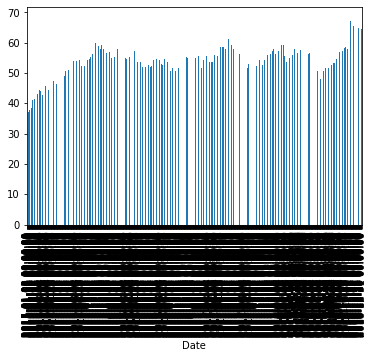

In [63]:
import matplotlib

df['Close'].resample('D').mean().plot.bar()

In [65]:
df.tail()

#shift all the data points for dates
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [66]:
df.shift(-1)
# last date got an empty data point 

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [67]:
#push all data points end of the month
df.shift(periods=1,freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


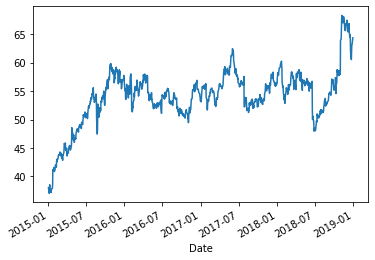

In [76]:
# Rolling and Expending

df['Close'].plot()

#add rolling mean
df['Close: 50 Day mean']=df['Close'].rolling(window=50).mean()

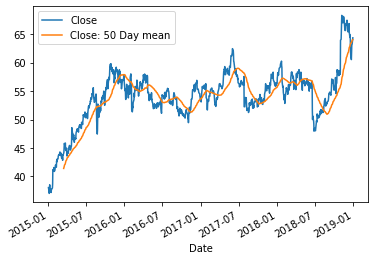

In [79]:
df[['Close','Close: 50 Day mean']].plot()

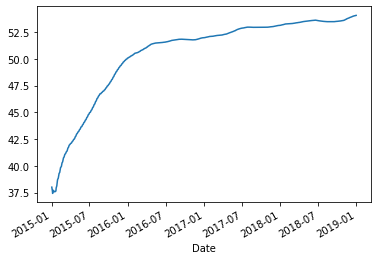

In [80]:
## Expanding window foreach time point
df['Close'].expanding().mean().plot()


In [81]:
# Visualizing time series
df.index

#if index not datetime type 
df.index = pd.to_datetime(df.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

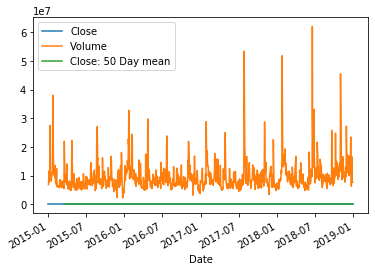

In [83]:
df.plot()
df.drop(columns='Close: 50 Day mean',inplace=True)


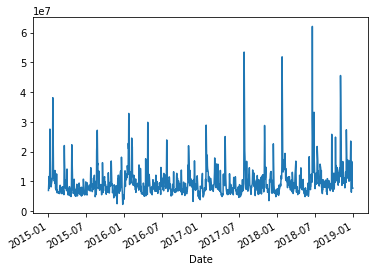

In [85]:
df['Volume'].plot()

[Text(0, 0.5, 'Y LABEL'), Text(0.5, 0, 'X LABEL')]

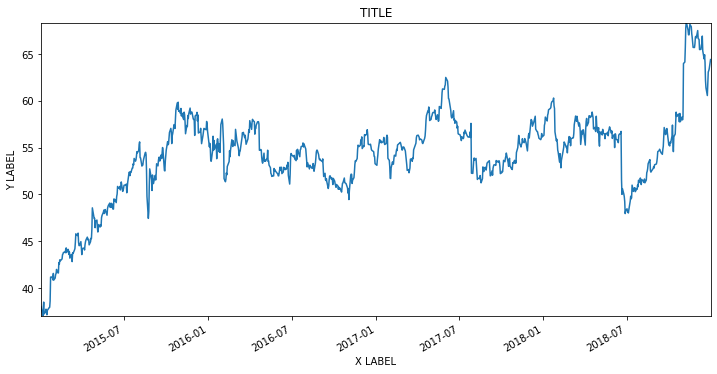

In [87]:
title = 'TITLE'
ylabel = 'Y LABEL'
xlabel = 'X LABEL'
ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

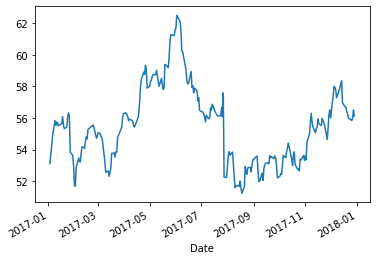

In [88]:
# limit the data option 1
df['Close']['2017-01-01':'2017-12-31'].plot()

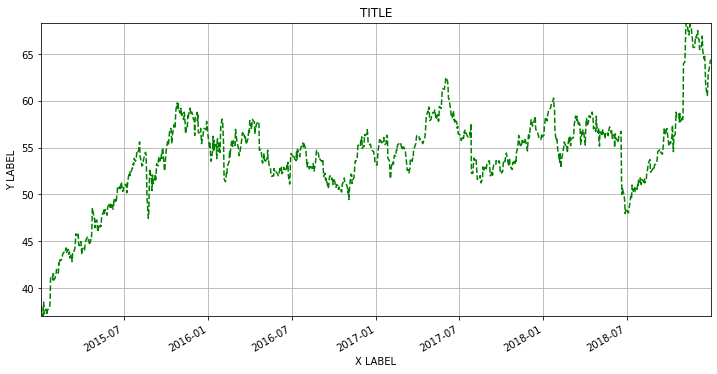

In [94]:
# option 2 use xlim

ax = df['Close'].plot(figsize=(12,6),title=title,xlim=['2017-01-01','2017-12-31'],ls='--',c='g')
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
ax.grid(True)

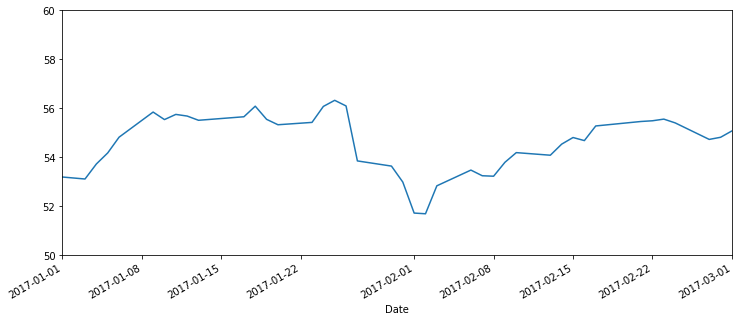

In [96]:
df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'],ylim=[50,60])

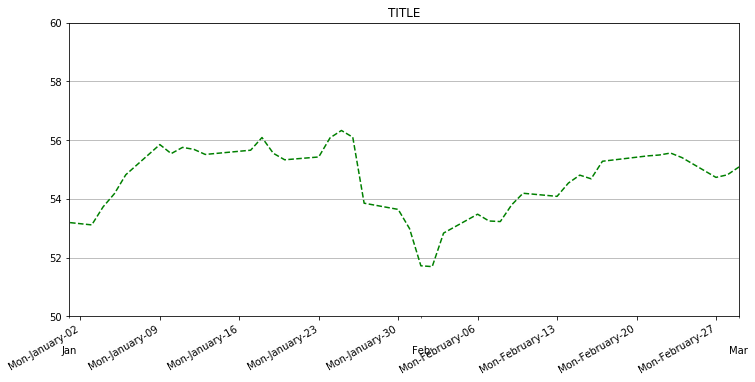

In [110]:
from matplotlib import dates
# set our own spacing
ax = df['Close'].plot(figsize=(12,6),title=title,xlim=['2017-01-01','2017-03-01'],ls='--',c='g',ylim=[50,60])
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.yaxis.grid(True)